$\textbf{PROGRAMMING ASSIGNMENT}$
---
# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

In [1]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
absenteeism_at_work = fetch_ucirepo(id=445) 
  
# data (as pandas dataframes) 
X = absenteeism_at_work.data.features 
y = absenteeism_at_work.data.targets 
  
# metadata 
print(absenteeism_at_work.metadata) 
  
# variable information 
print(absenteeism_at_work.variables) 

{'uci_id': 445, 'name': 'Absenteeism at work', 'repository_url': 'https://archive.ics.uci.edu/dataset/445/absenteeism+at+work', 'data_url': 'https://archive.ics.uci.edu/static/public/445/data.csv', 'abstract': 'The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 740, 'num_features': 19, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Education Level'], 'target_col': ['Absenteeism time in hours'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5X882', 'creators': ['Andrea Martiniano', 'Ricardo Ferreira'], 'intro_paper': {'title': 'Application of a neuro fuzzy network in prediction of absenteeism at work', 'authors': 'Andréa Martiniano, R. P. Ferre

In [3]:
# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)
print(data)

     Reason for absence  Month of absence  Day of the week  Seasons  \
0                    26                 7                3        1   
1                     0                 7                3        1   
2                    23                 7                4        1   
3                     7                 7                5        1   
4                    23                 7                5        1   
..                  ...               ...              ...      ...   
735                  14                 7                3        1   
736                  11                 7                3        1   
737                   0                 0                3        1   
738                   0                 0                4        2   
739                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                       289                               36         

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

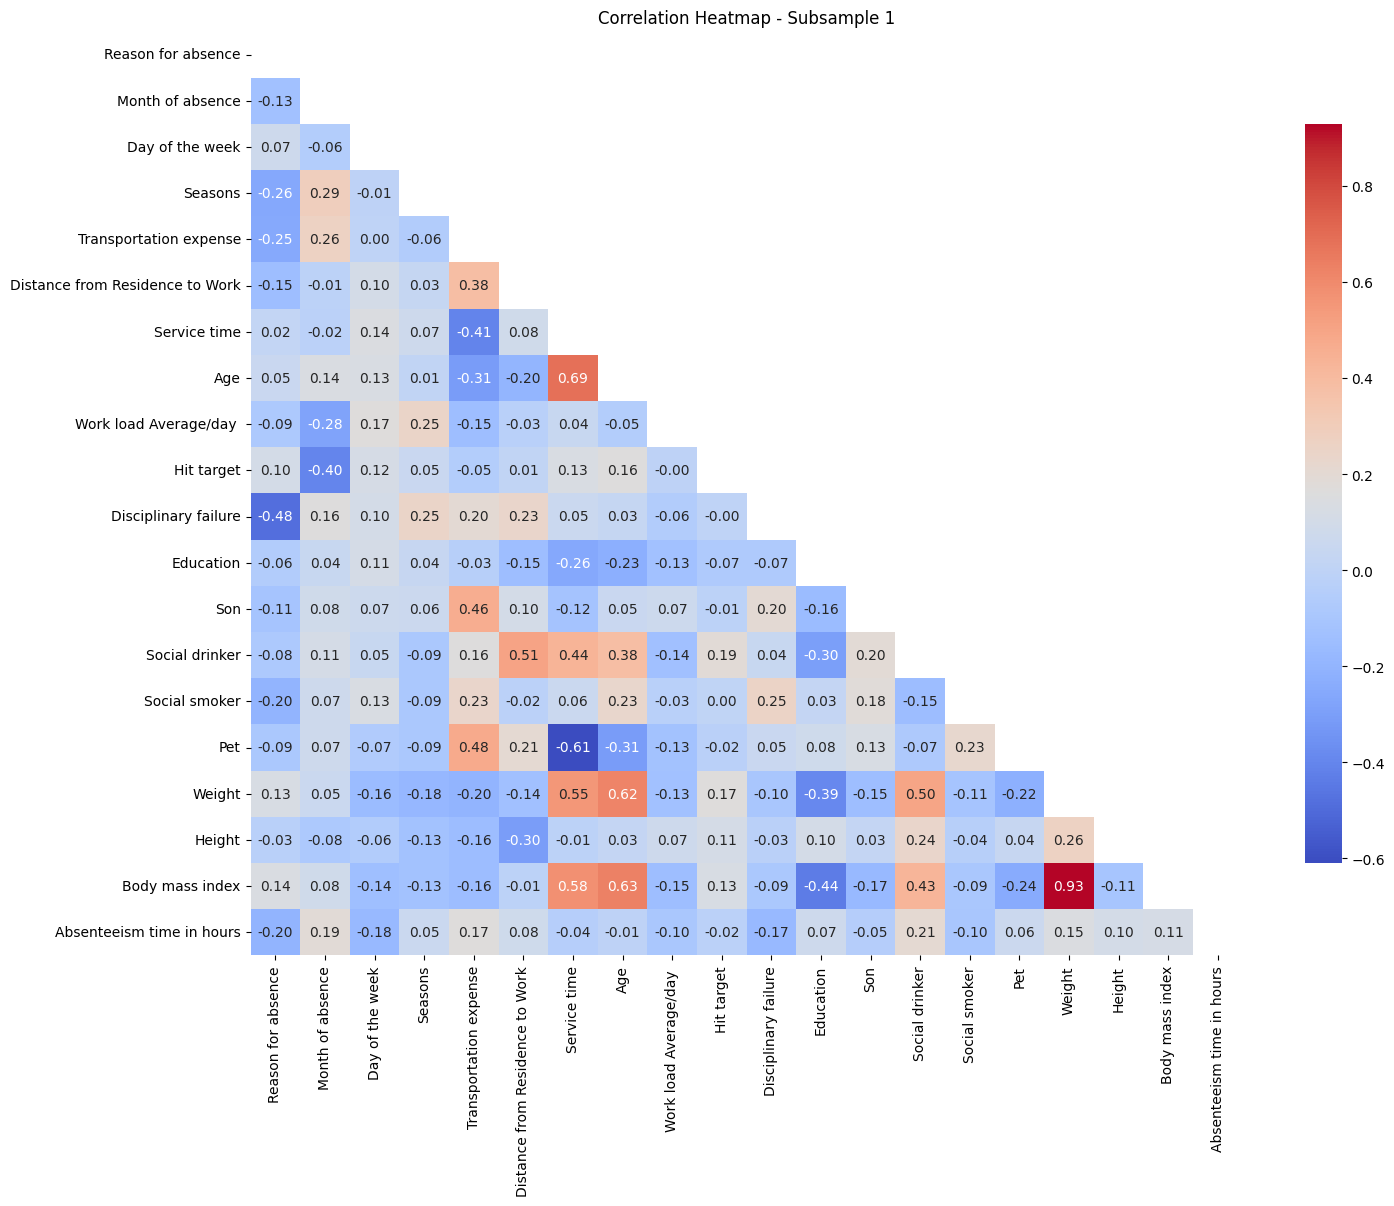

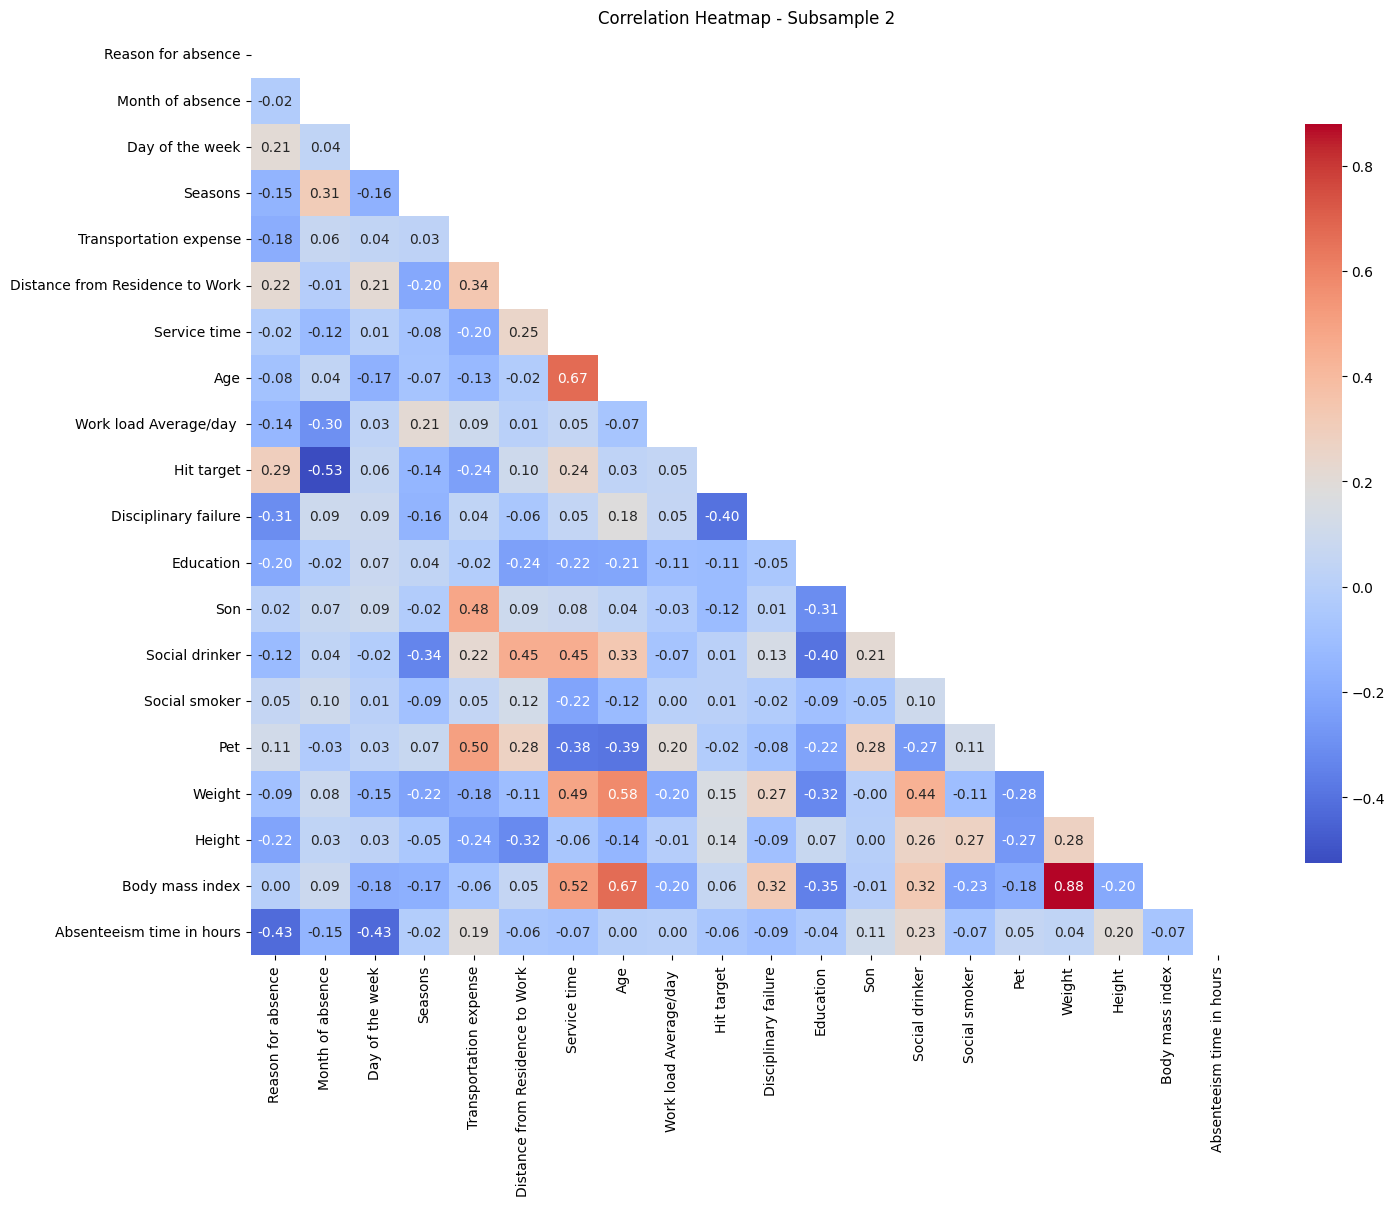

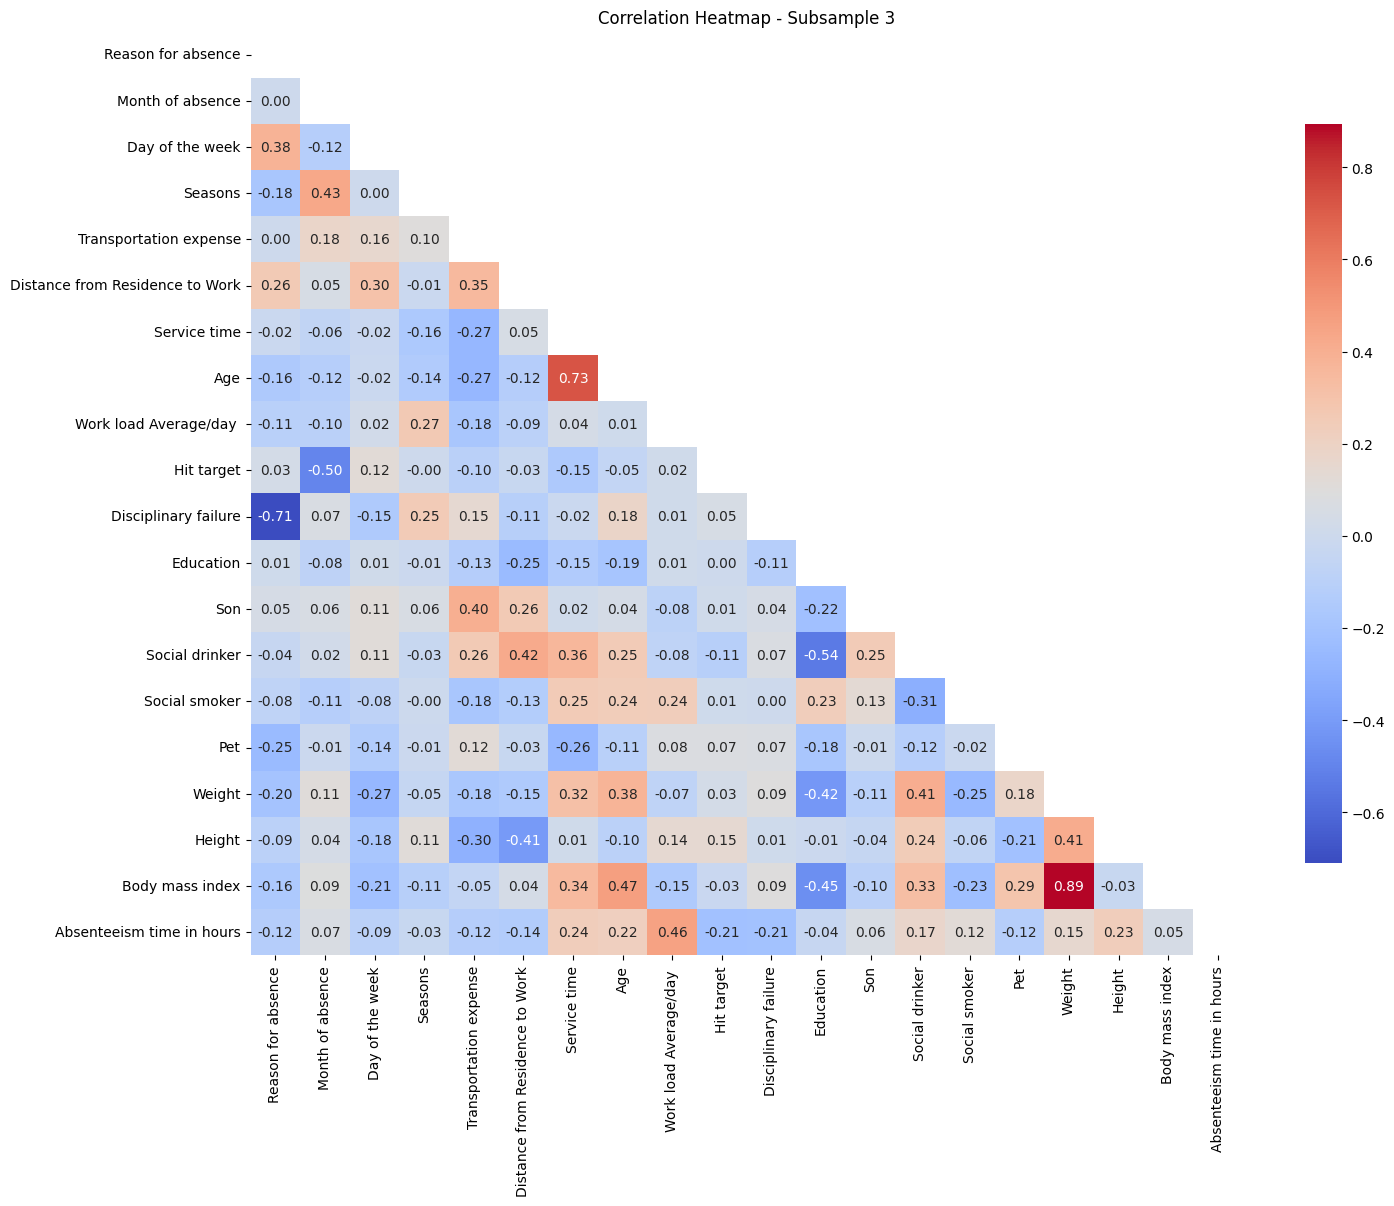

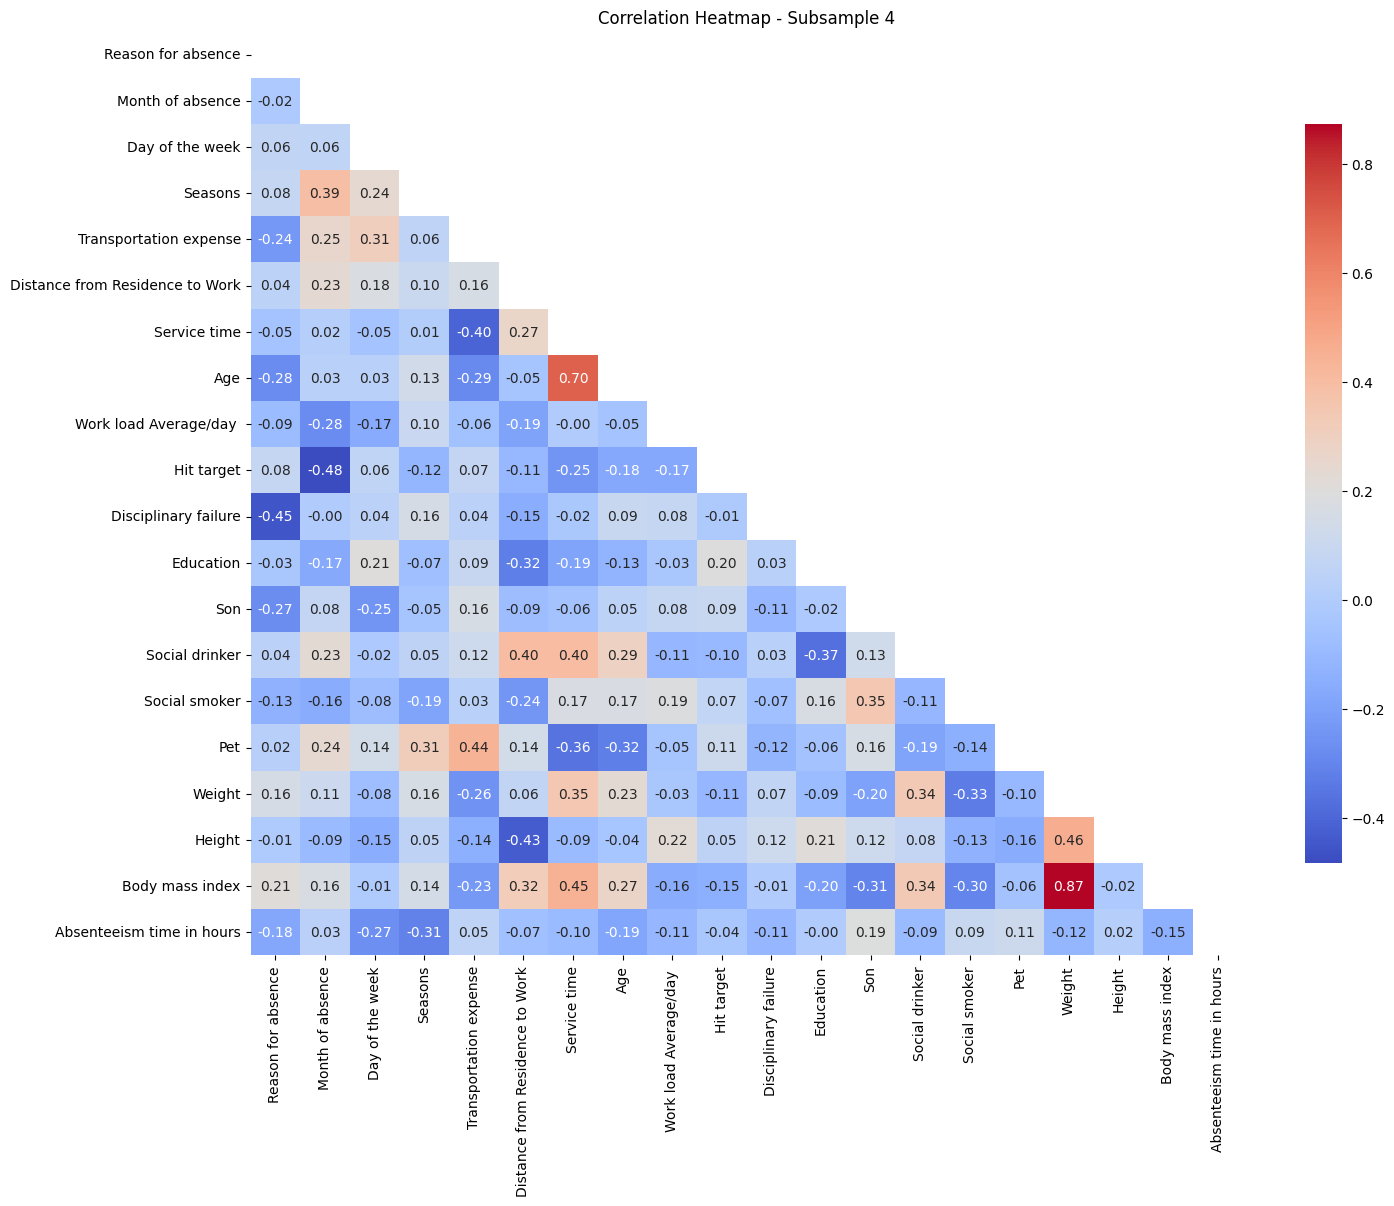

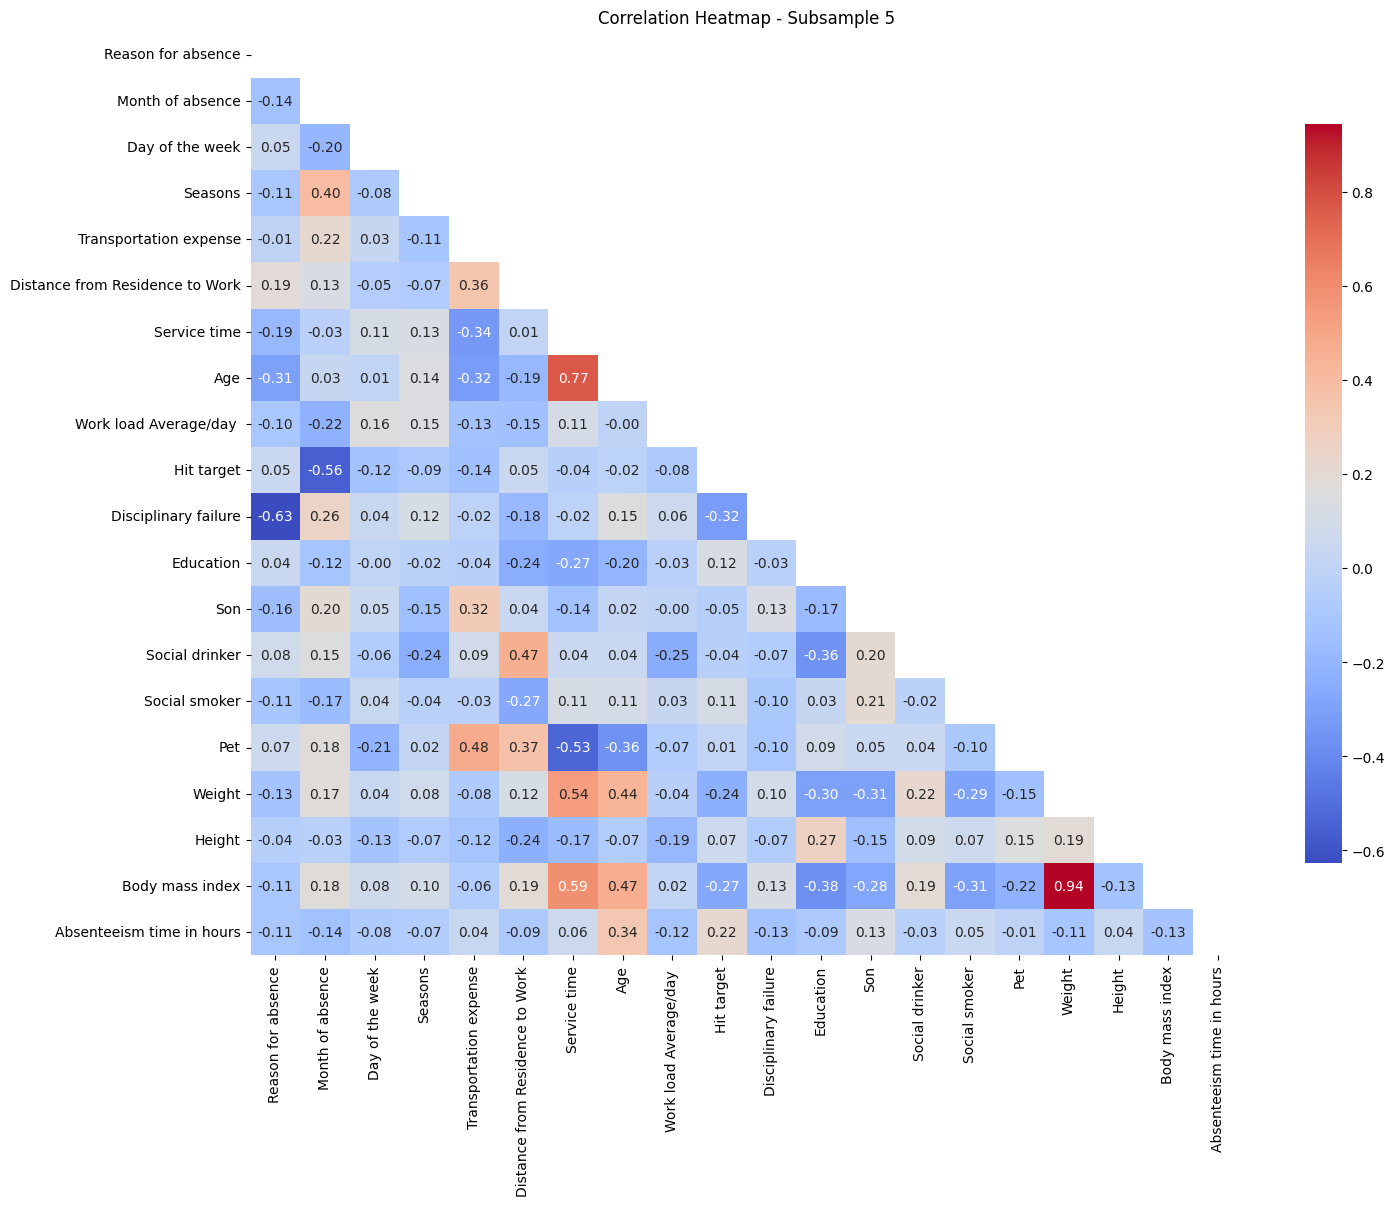

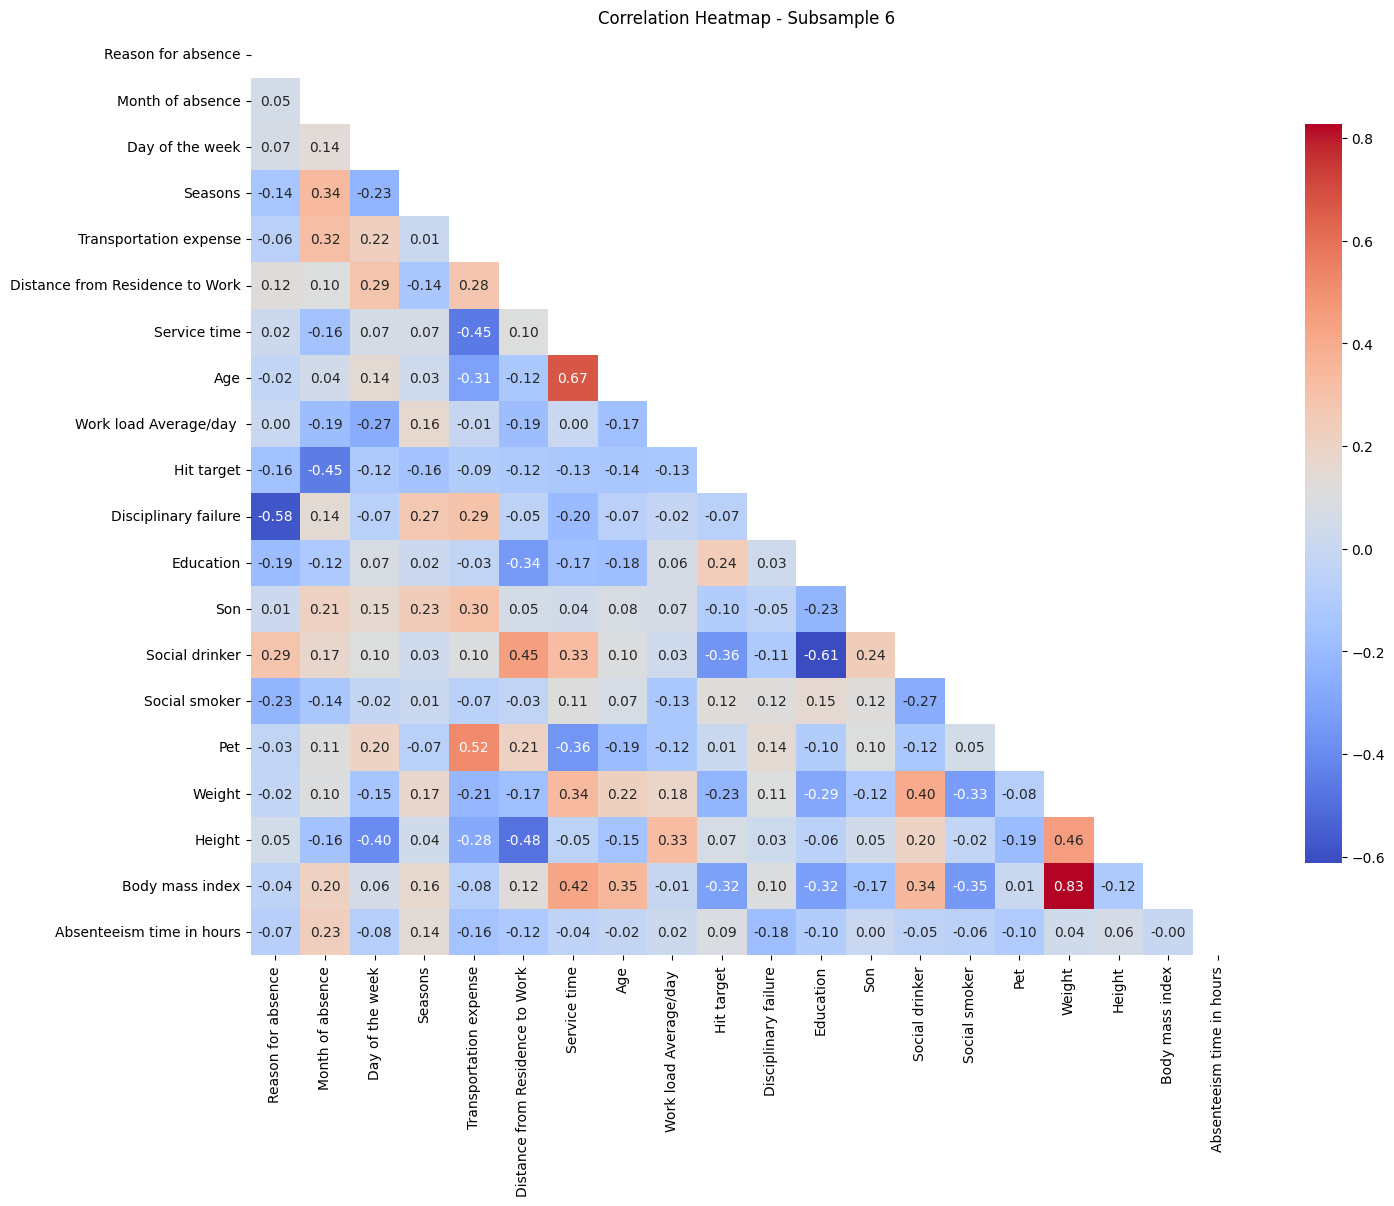

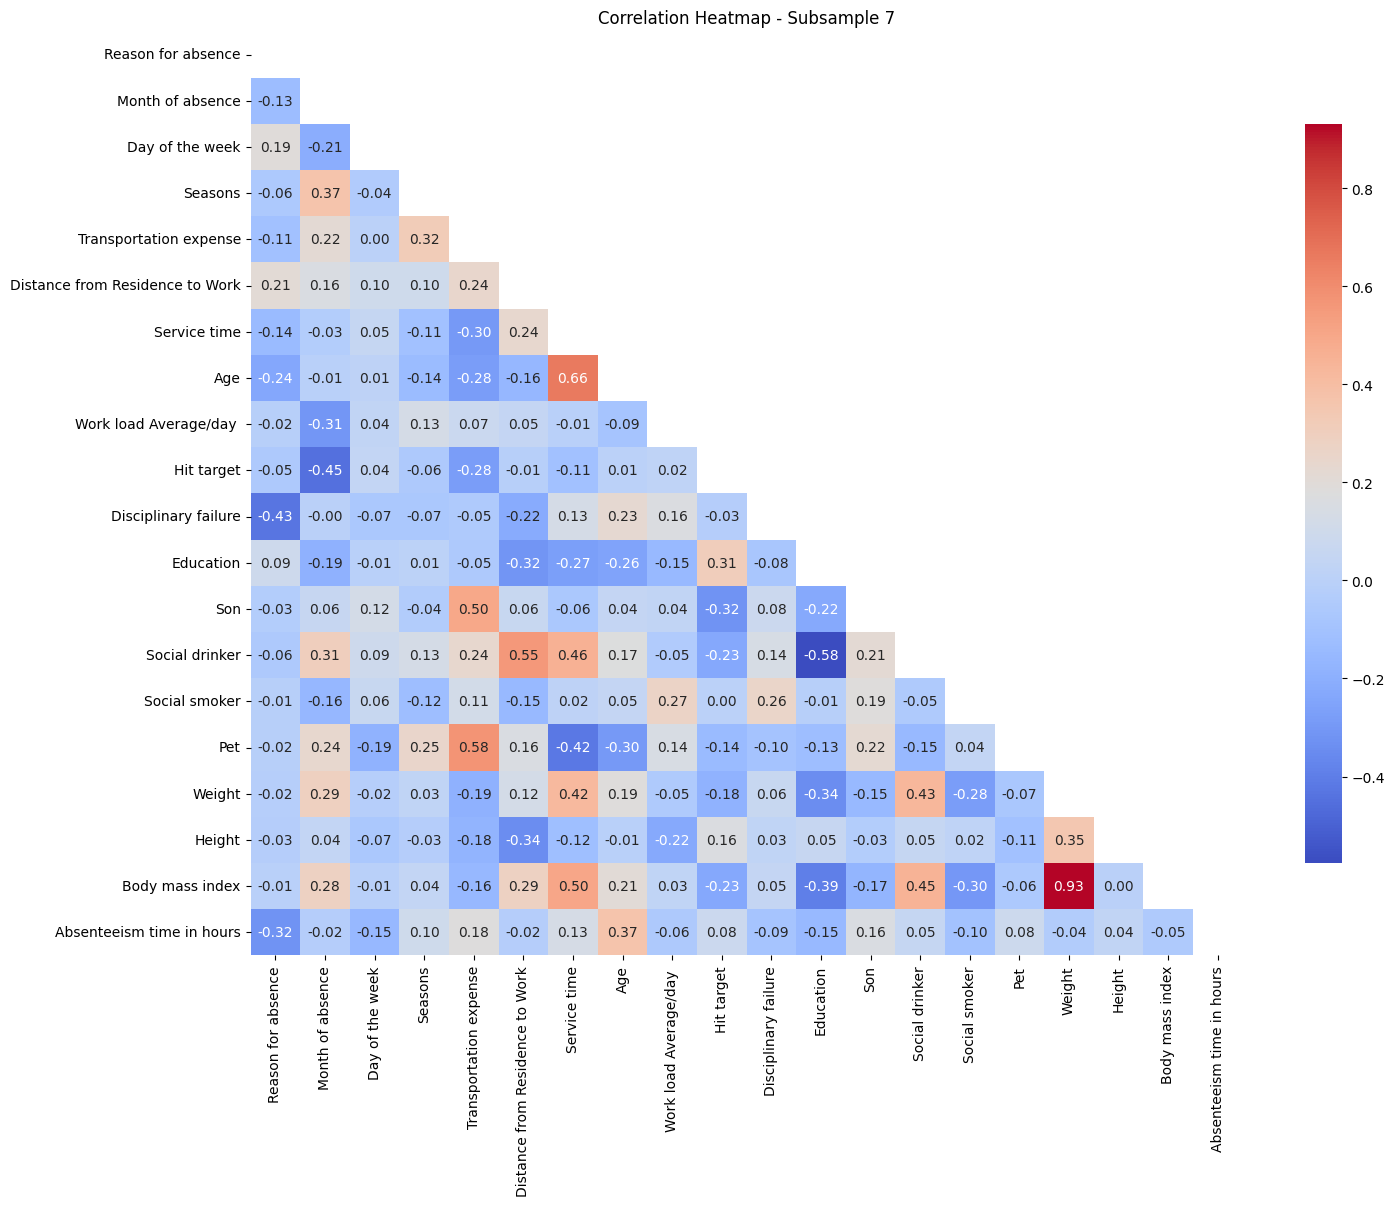

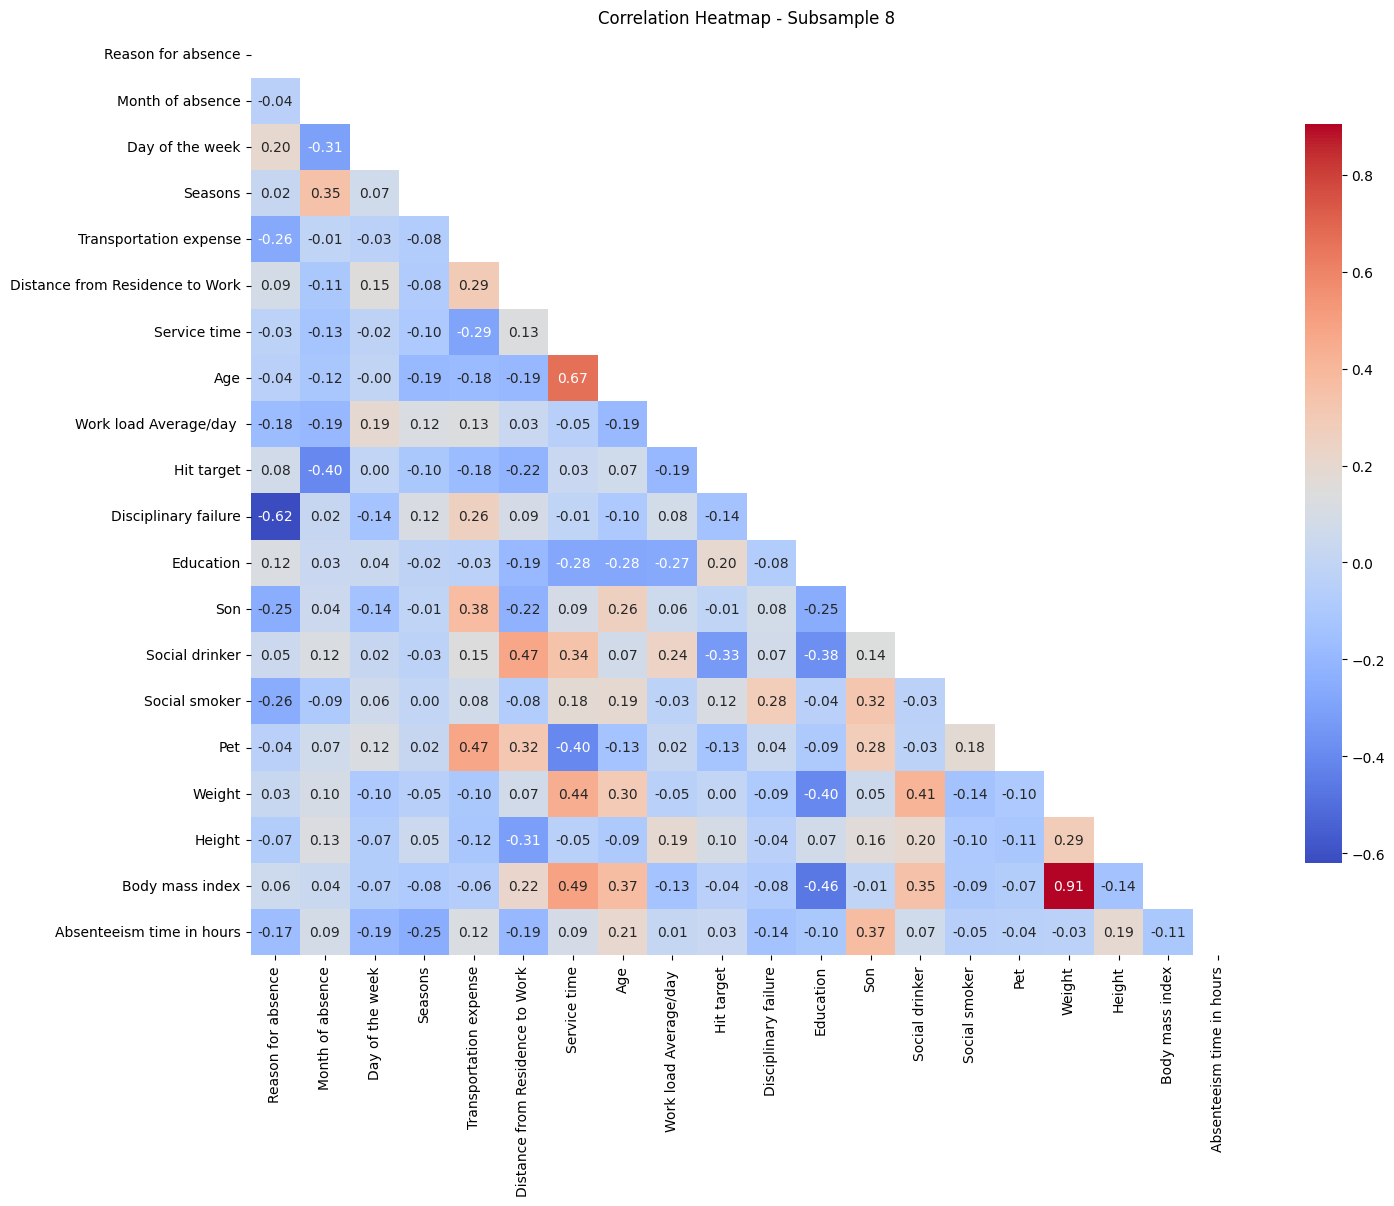

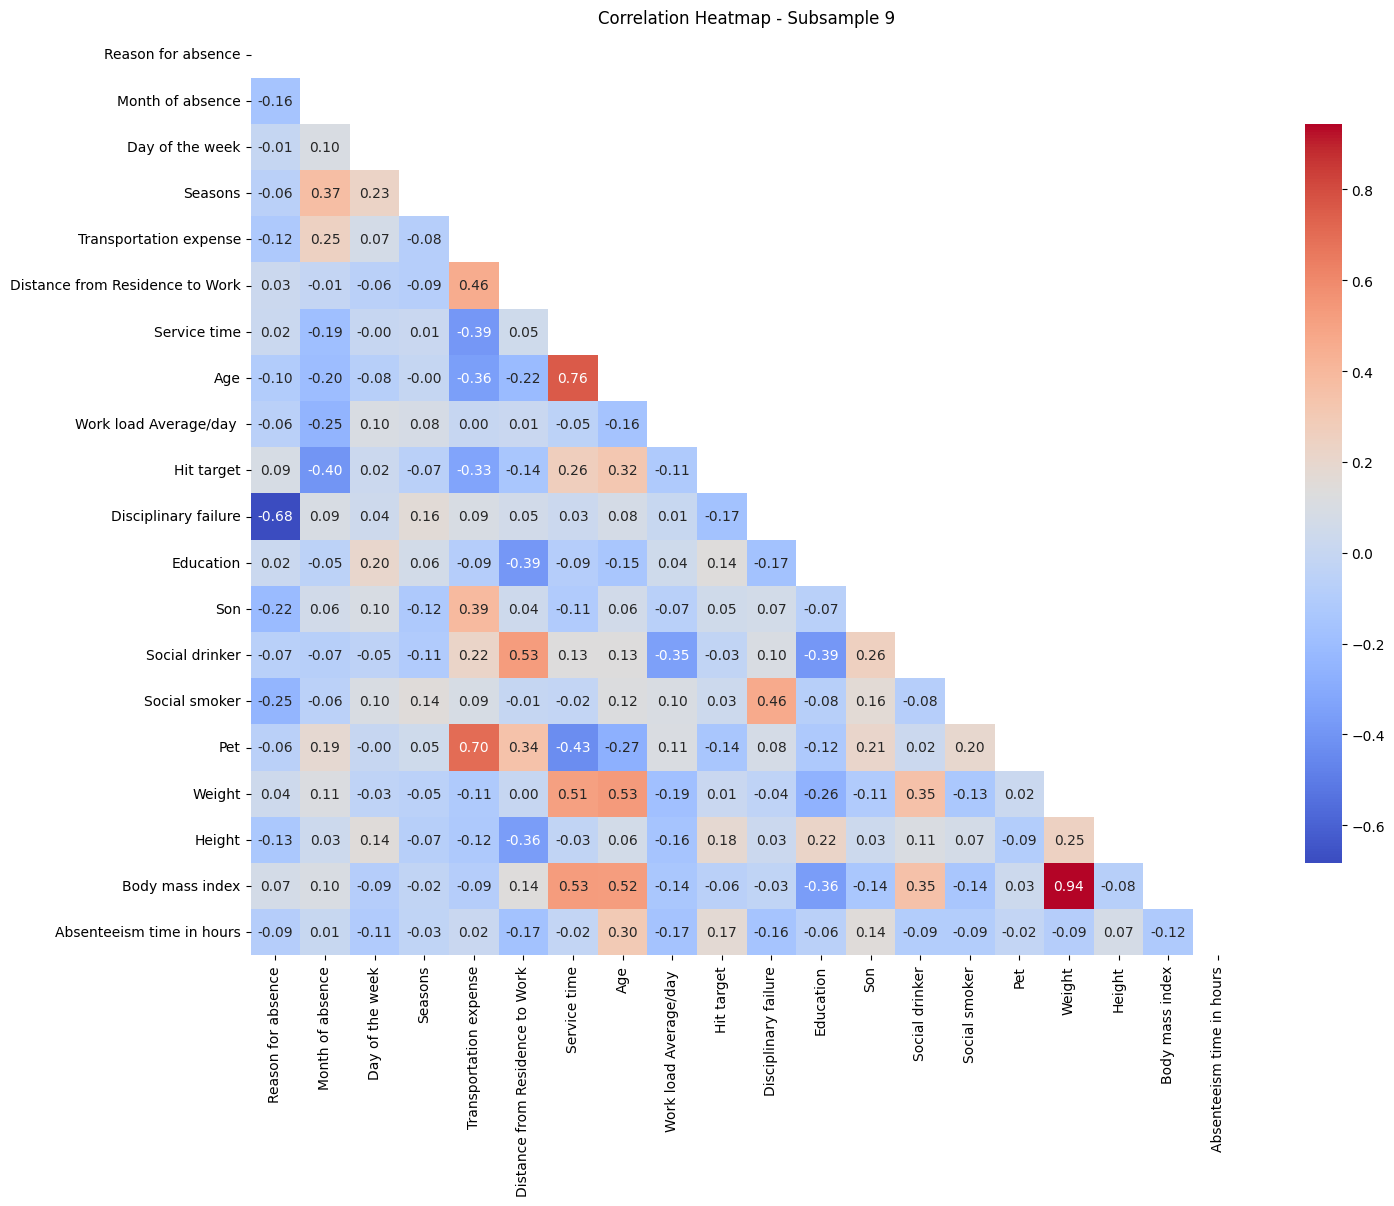

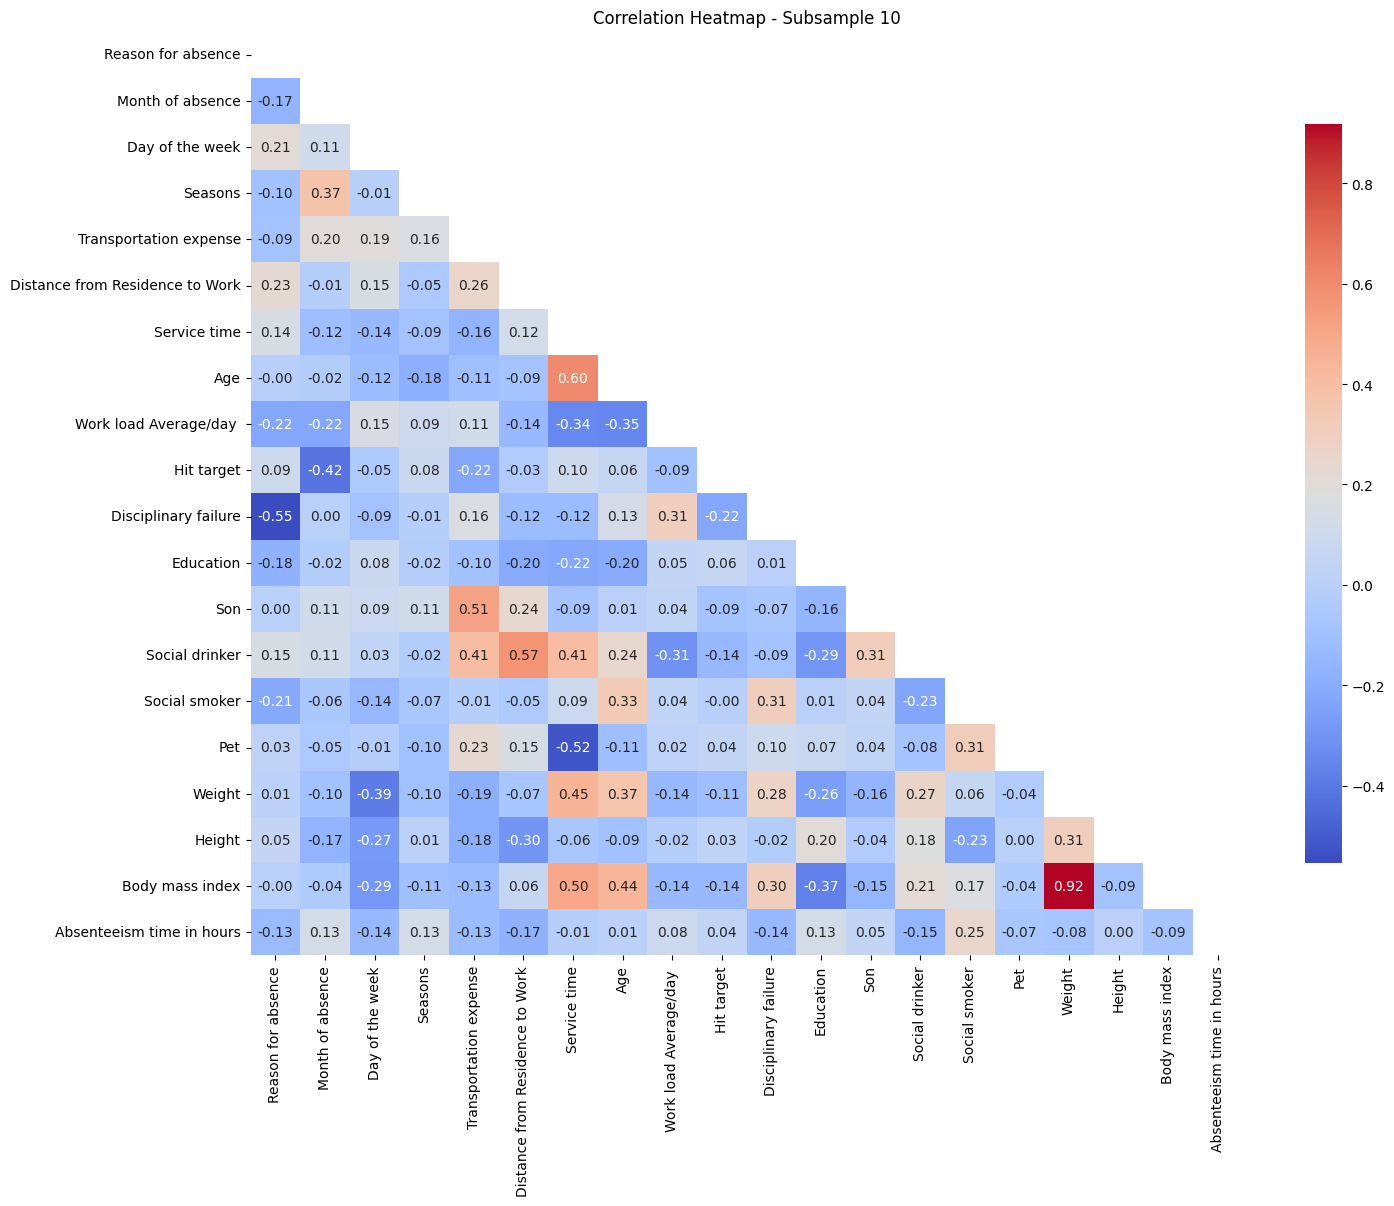

In [4]:
absenteeism_at_work_numeric = data.dropna().select_dtypes(include=[np.number])
num_subsamples = 10
subsample_size = len(absenteeism_at_work_numeric) // num_subsamples
correlation_plots = []

for i in range(num_subsamples):
    subsample_indices = np.random.choice(absenteeism_at_work_numeric.index, size=subsample_size, replace=False)
    subsample = absenteeism_at_work_numeric.loc[subsample_indices]
    correlation_matrix = subsample.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"shrink": .8})
    plt.title(f'Correlation Heatmap - Subsample {i+1}')
    plt.show()

**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**
**TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe**

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


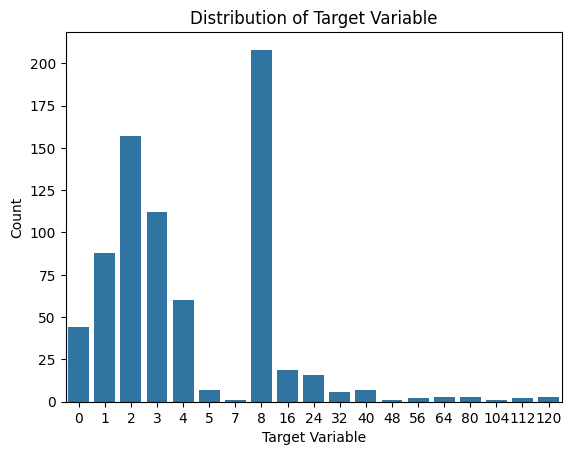

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data.columns)

sns.countplot(x='Absenteeism time in hours', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

<Figure size 1200x1000 with 0 Axes>

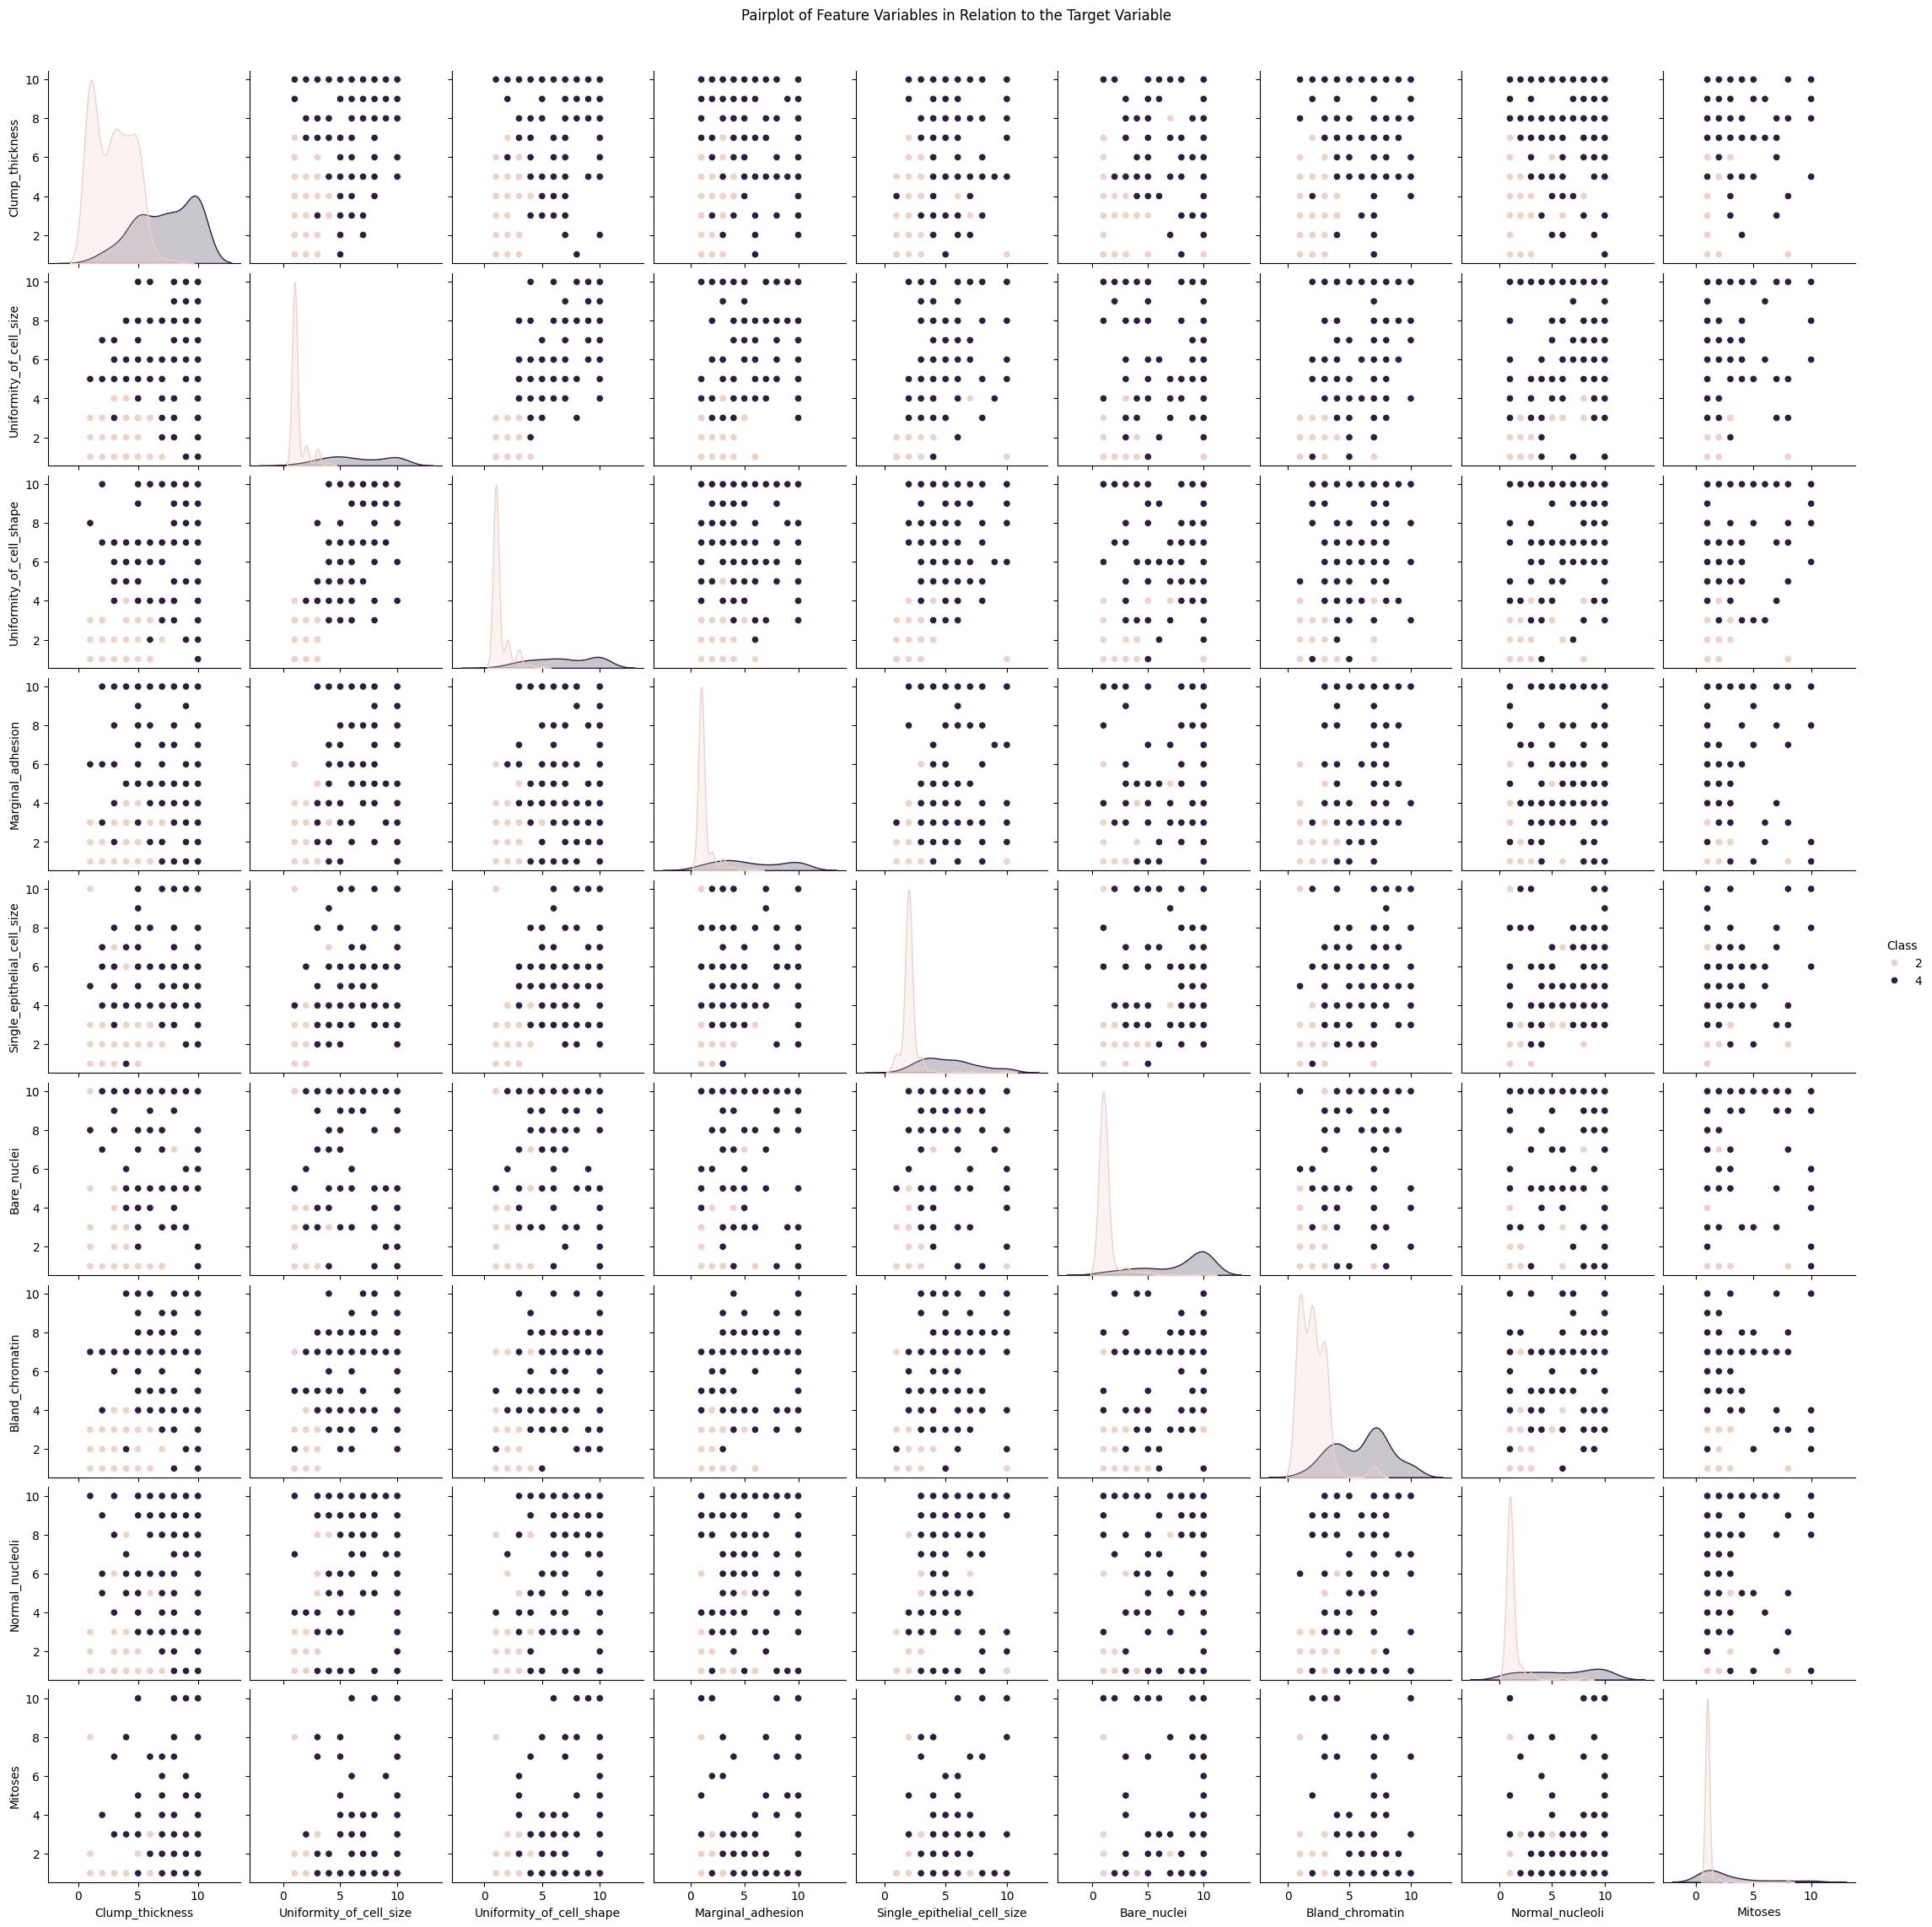

In [ ]:
subsample_size = len(absenteeism_at_work_numeric) // 2
subsample_indices = np.random.choice(absenteeism_at_work_numeric.index, size=subsample_size, replace=False)
subsample = absenteeism_at_work_numeric.loc[subsample_indices]

plt.figure(figsize=(12, 10))
sns.pairplot(subsample, hue=y.columns[0], diag_kind='kde')
plt.suptitle('Pairplot of Feature Variables in Relation to the Target Variable', y=1.02)
plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

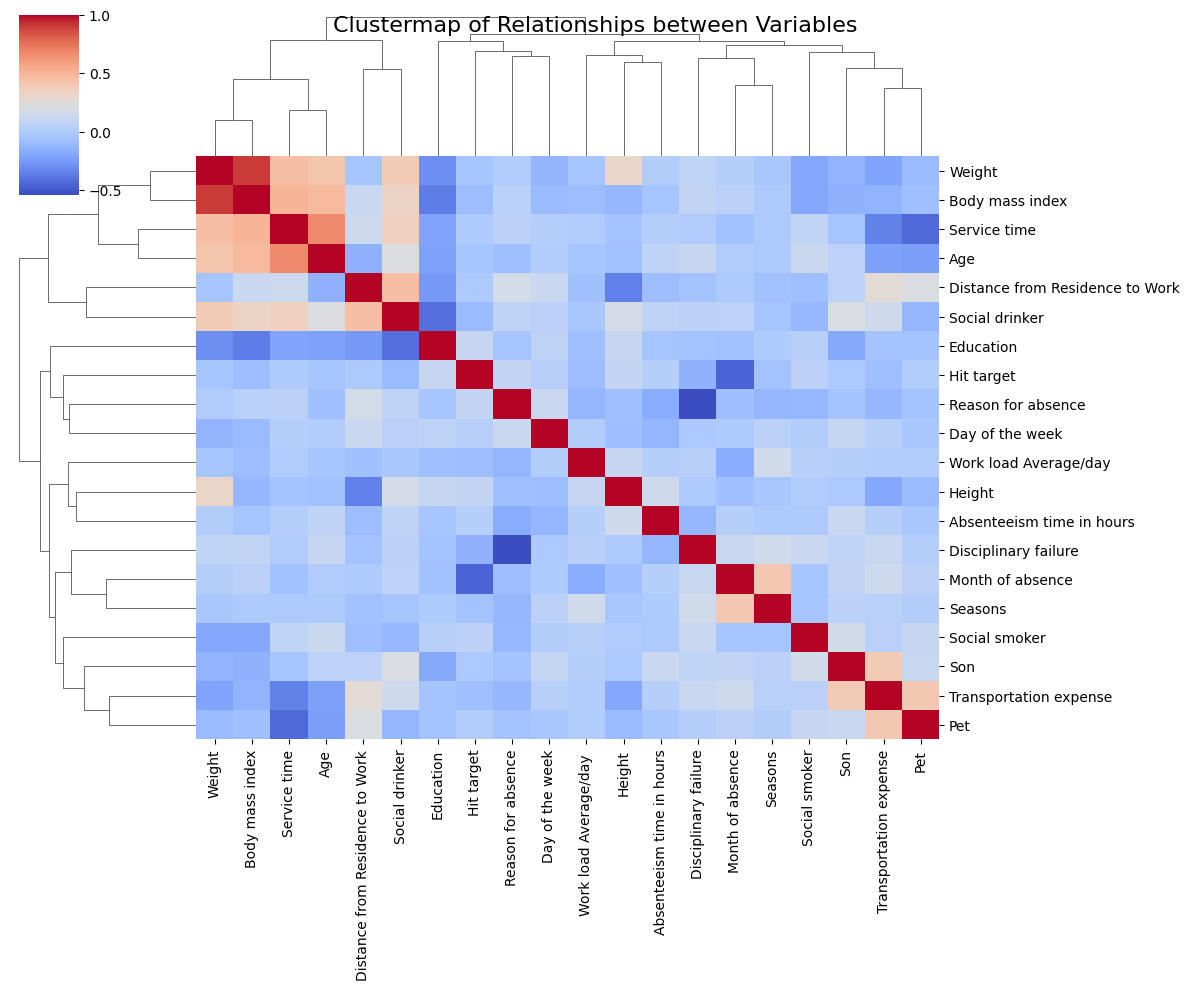

In [6]:
clustermap_fig = sns.clustermap(absenteeism_at_work_numeric.corr(), cmap='coolwarm', figsize=(12, 10))
clustermap_fig.fig.suptitle('Clustermap of Relationships between Variables', fontsize=16)  # Add a figure-level title
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_baseline = SVC()
svm_baseline.fit(X_train, y_train)
baseline_predictions = svm_baseline.predict(X_test)

print("Baseline SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, baseline_predictions))
print("Classification Report:\n", classification_report(y_test, baseline_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, baseline_predictions))

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}
svm_grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
svm_grid_search.fit(X_train, y_train)

print("Best parameters:", svm_grid_search.best_params_)

best_svm_model = svm_grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)
grid_predictions = best_svm_model.predict(X_test)

print("\nTuned SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, grid_predictions))
print("Classification Report:\n", classification_report(y_test, grid_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, grid_predictions))

Baseline SVM Model Performance:
Accuracy: 0.948905109489051
Classification Report:
               precision    recall  f1-score   support

           2       0.94      0.97      0.96        79
           4       0.96      0.91      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137

Confusion Matrix:
 [[77  2]
 [ 5 53]]
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV